# ML CVDs Project


# Exploratory Data Analysis

In [642]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns



data = pd.read_csv('./student_version.csv')
data.head(5)



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,42,M,NAP,120,240,1,Normal,194,N,0.8,Down,0
1,36,M,NAP,130,209,0,Normal,178,N,0.0,Up,0
2,56,M,ASY,150,213,1,Normal,125,Y,1.0,Flat,1
3,37,F,NAP,130,211,0,Normal,142,N,0.0,Up,0
4,51,M,ASY,120,0,1,Normal,104,N,0.0,Flat,1


In [643]:
print("Size of dataset:",data.shape)
print("Dataset description:")
data.info()
data.describe()




Size of dataset: (734, 12)
Dataset description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             734 non-null    int64  
 1   Sex             734 non-null    object 
 2   ChestPainType   734 non-null    object 
 3   RestingBP       734 non-null    int64  
 4   Cholesterol     734 non-null    int64  
 5   FastingBS       734 non-null    int64  
 6   RestingECG      734 non-null    object 
 7   MaxHR           734 non-null    int64  
 8   ExerciseAngina  734 non-null    object 
 9   Oldpeak         734 non-null    float64
 10  ST_Slope        734 non-null    object 
 11  HeartDisease    734 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 68.9+ KB


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,53.651226,133.064033,199.683924,0.227520,136.178474,0.905041,0.546322
std,9.364290,18.438941,108.216855,0.419517,25.329254,1.082952,0.498189
min,29.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,177.000000,0.000000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,269.000000,0.000000,155.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [644]:
#Checking for duplicated rows or null values

dupl = data[data.duplicated()]
print(dupl.shape)

data.isnull().sum()


(0, 12)


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

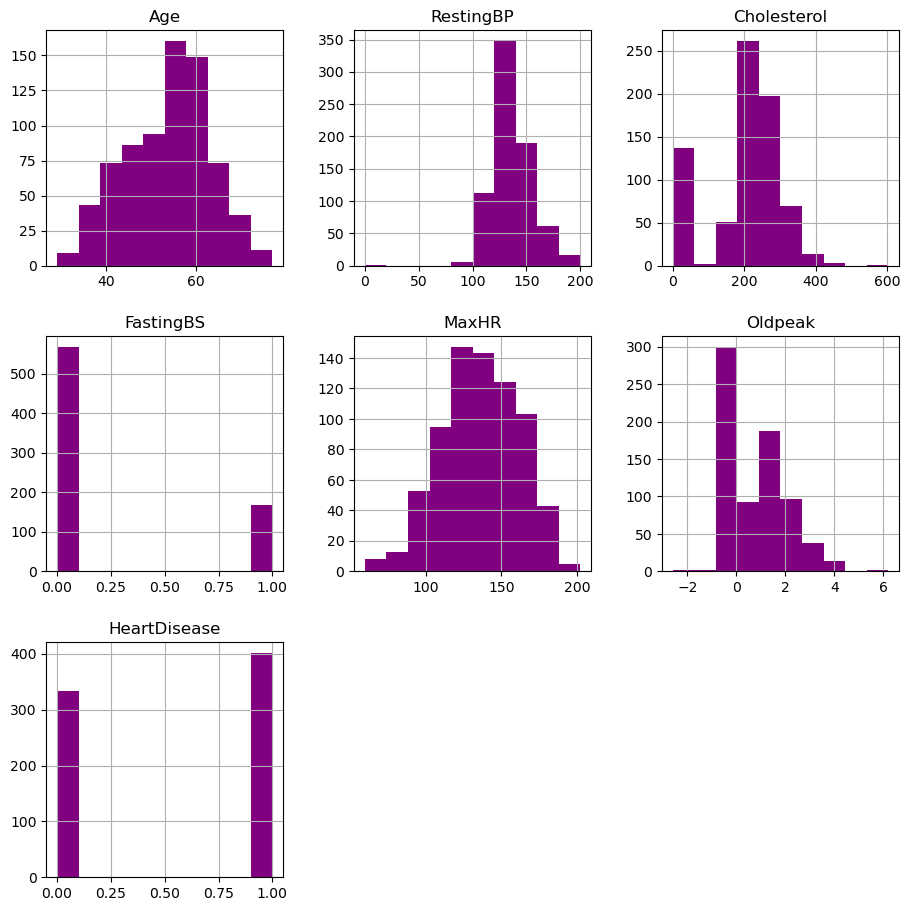

In [645]:
#Overview of features distribution in the dataset
data.hist(figsize = (11,11), color="#800080")


In [646]:
#Replacing 0 values with null

data[['RestingBP','Cholesterol']] = data[['RestingBP','Cholesterol']].replace(0,np.NaN)
data.isnull().sum()




Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       137
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [647]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,734.000000,733.000000,597.000000,734.000000,734.000000,734.000000,734.000000
mean,53.651226,133.245566,245.507538,0.227520,136.178474,0.905041,0.546322
std,9.364290,17.783066,55.981259,0.419517,25.329254,1.082952,0.498189
min,29.000000,94.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,208.000000,0.000000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,277.000000,0.000000,155.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [648]:
#Replacing null values in columns which had 0 with mean of the rest of the data

data['Cholesterol']=data['Cholesterol'].fillna(data['Cholesterol'].mean())
data['RestingBP']=data['RestingBP'].fillna(data['RestingBP'].mean())
#data.describe()
data.isnull().sum()




Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

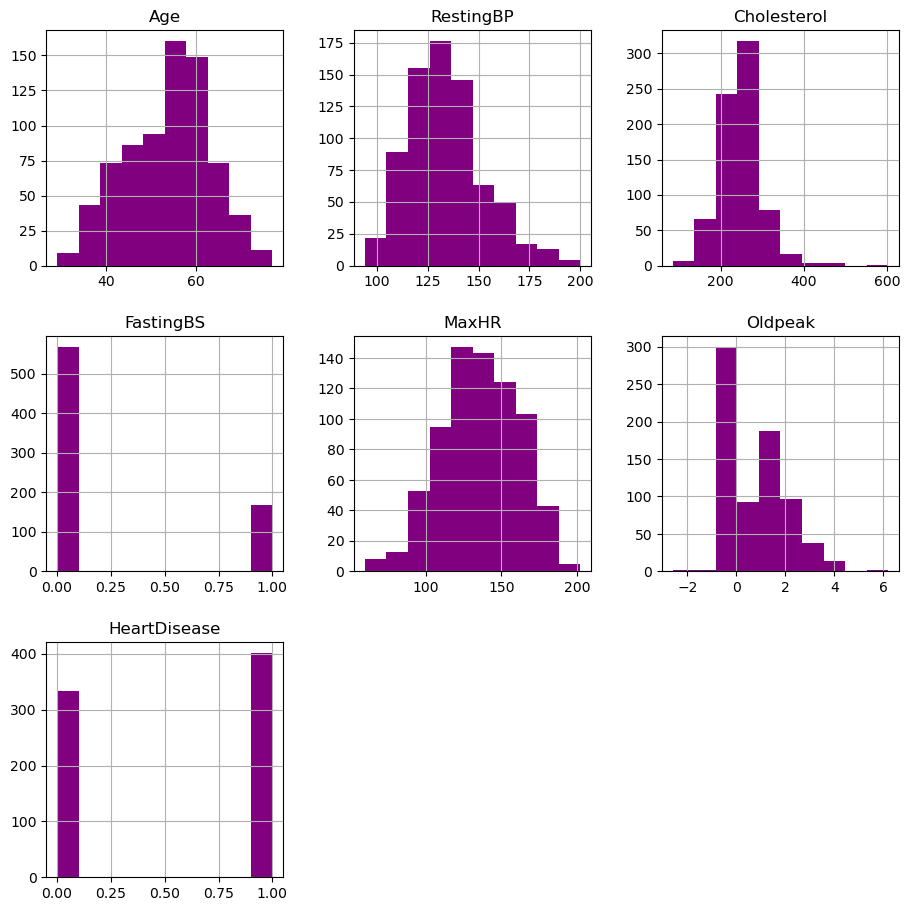

In [649]:
#Data distribution after removing nulls

data.hist(figsize = (11,11), color="#800080")


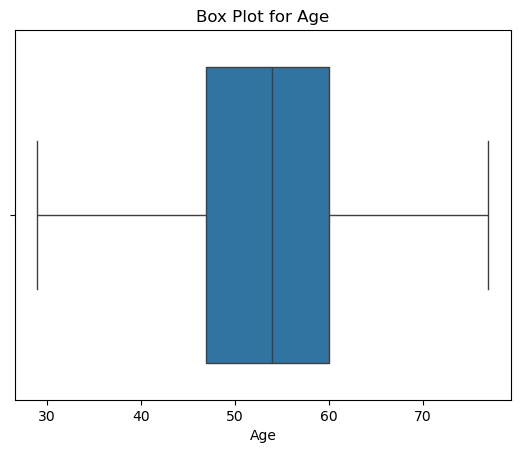

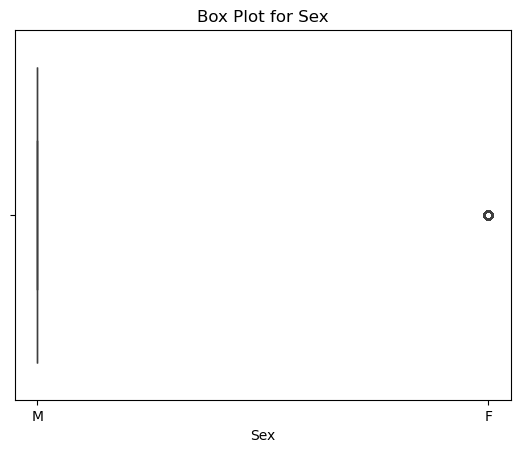

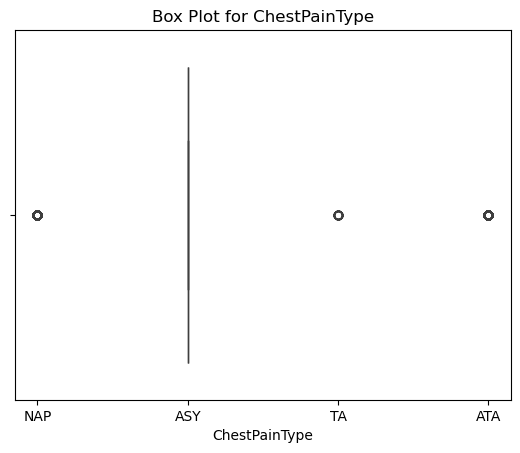

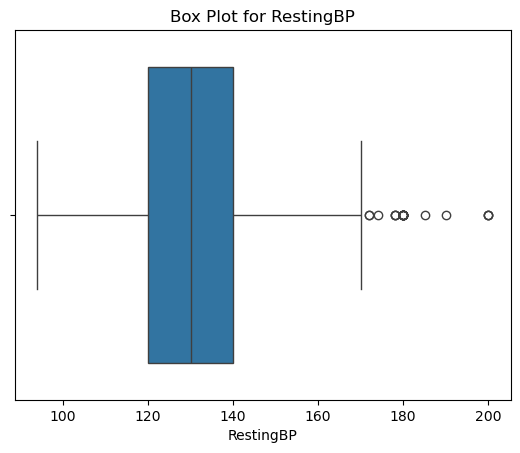

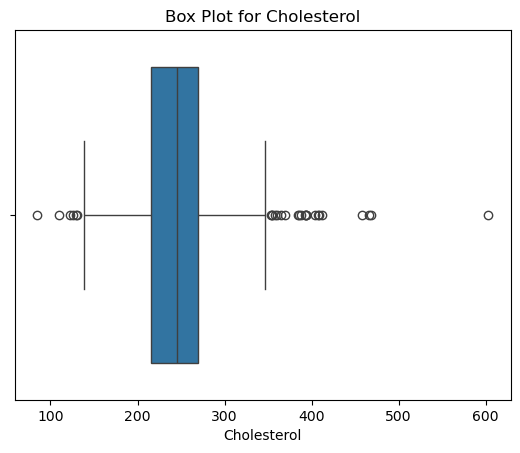

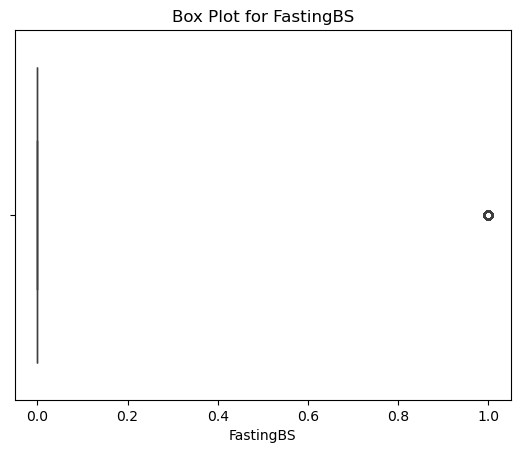

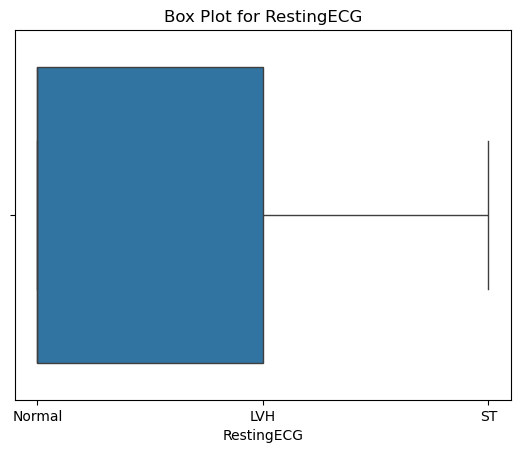

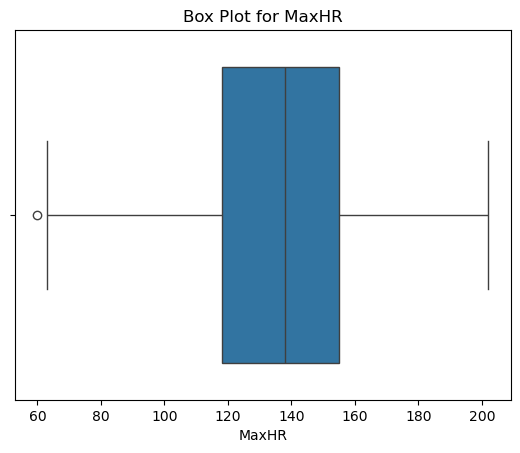

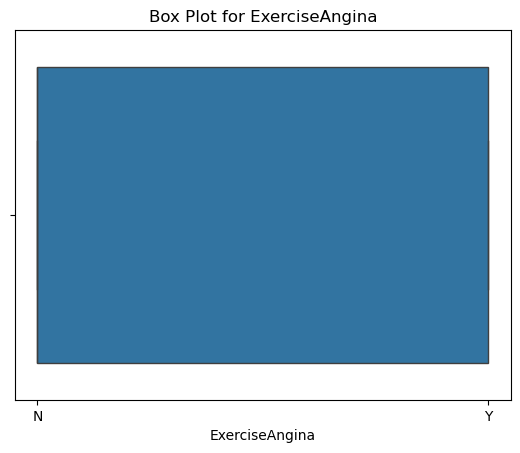

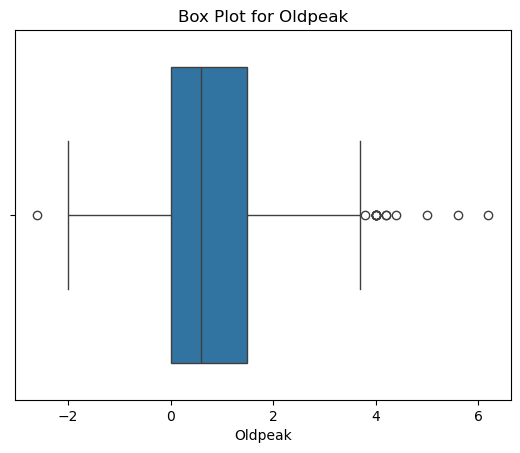

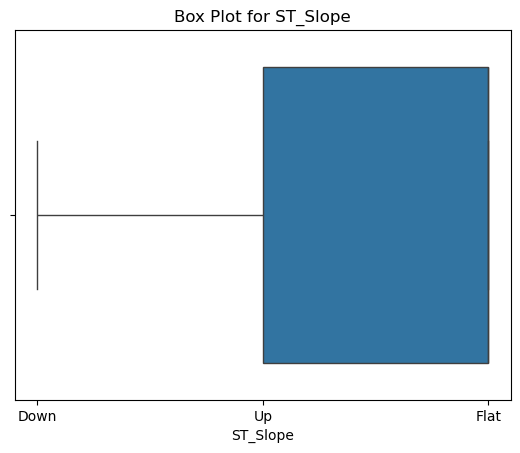

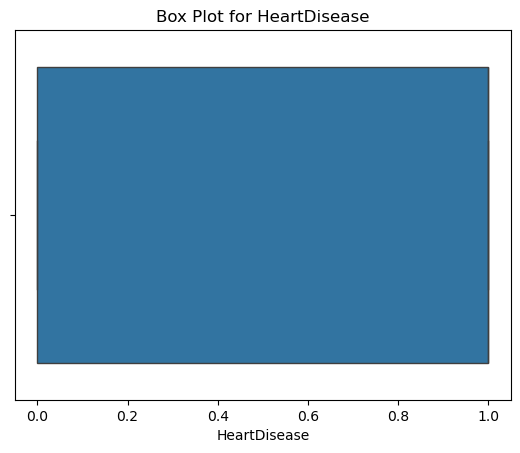

In [650]:
#Box plot for features for detecting outliers

for column in data.columns:
    sns.boxplot(x=data[column])
    plt.title(f"Box Plot for {column}")
    plt.show()

In [651]:
#Removing outlier rows using numerical columns

print(data.shape)
numeric_data = data.select_dtypes(include='number')
numeric_data = numeric_data.drop(columns=['FastingBS','HeartDisease'])


Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

non_outlier_indices = ~((numeric_data < lower_bound) | (numeric_data > upper_bound)).any(axis=1)

cleaned_data = data[non_outlier_indices]


print(cleaned_data.shape)


(734, 12)
(670, 12)


In [652]:
#Resetting index of cleaned data after removing rows

cleaned_data = cleaned_data.reset_index(drop=True)
cleaned_data.tail(15)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
655,41,M,ATA,125.0,269.000000,0,Normal,144,N,0.0,Up,0
656,53,F,ATA,140.0,216.000000,0,Normal,142,Y,2.0,Flat,0
657,61,M,ASY,134.0,245.507538,1,ST,86,N,1.5,Flat,1
658,60,M,NAP,115.0,245.507538,1,Normal,143,N,2.4,Up,1
659,47,M,ASY,150.0,226.000000,0,Normal,98,Y,1.5,Flat,1
660,55,M,NAP,120.0,245.507538,0,ST,125,Y,2.5,Flat,1
661,52,F,NAP,125.0,272.000000,0,Normal,139,N,0.0,Up,0
662,62,M,ATA,120.0,254.000000,0,LVH,93,Y,0.0,Flat,1
663,43,F,TA,100.0,223.000000,0,Normal,142,N,0.0,Up,0
664,42,M,TA,148.0,244.000000,0,LVH,178,N,0.8,Up,0


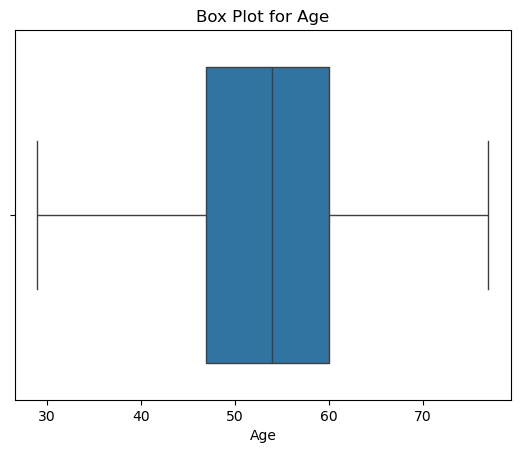

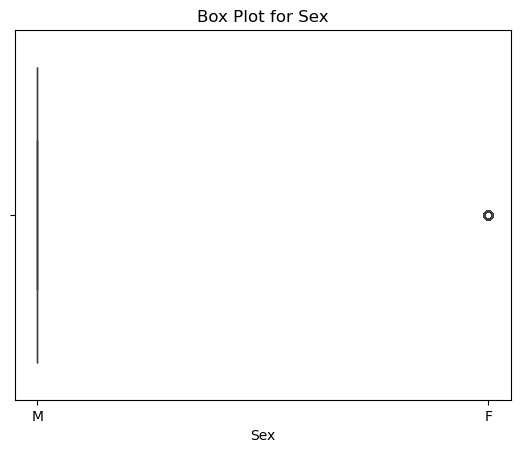

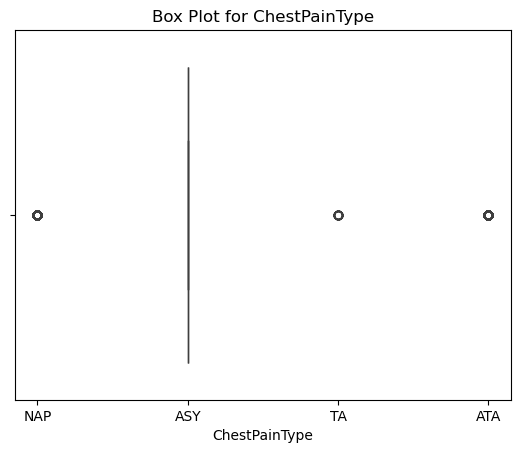

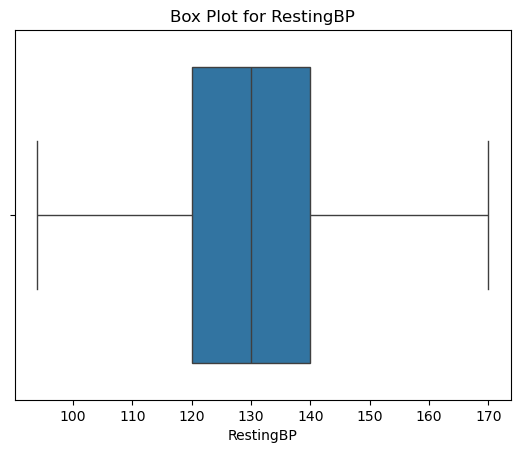

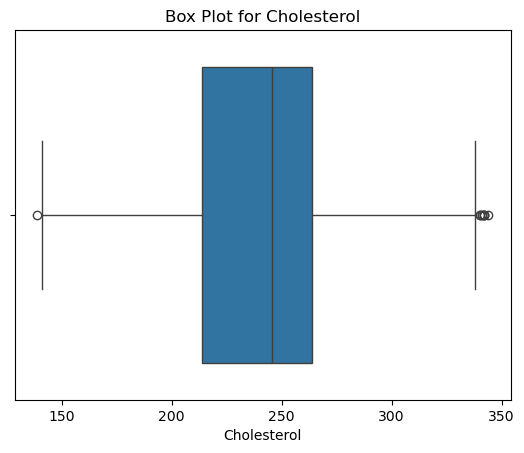

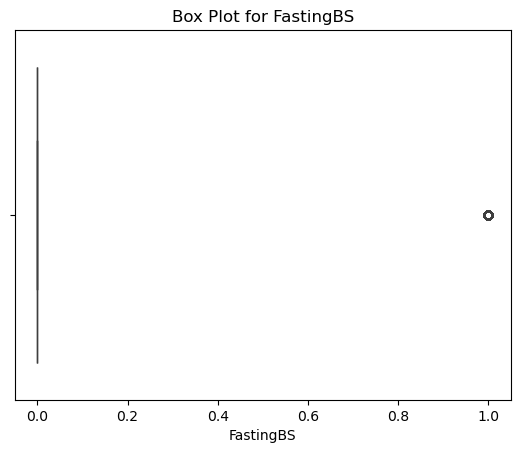

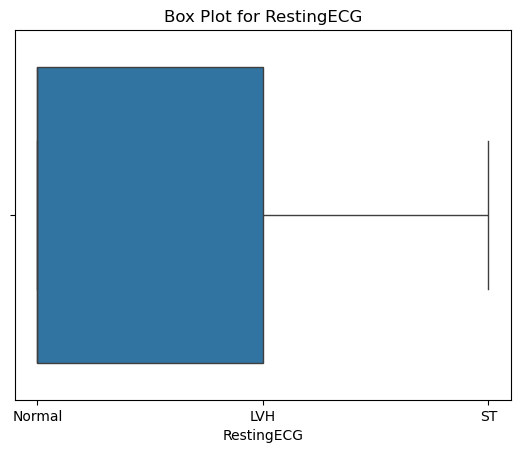

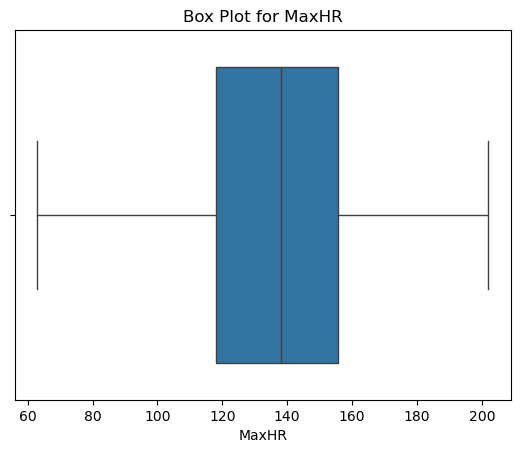

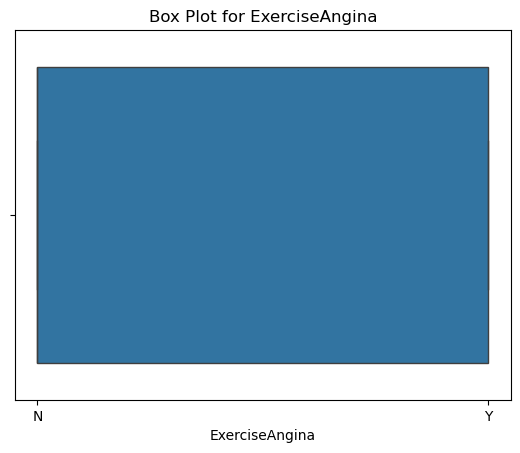

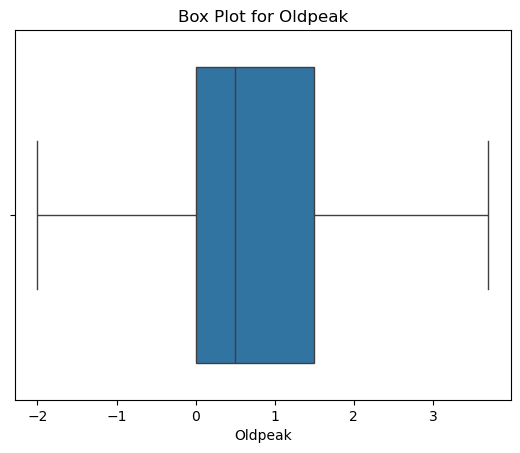

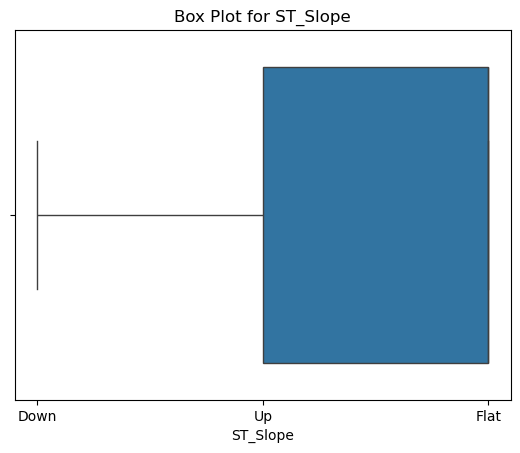

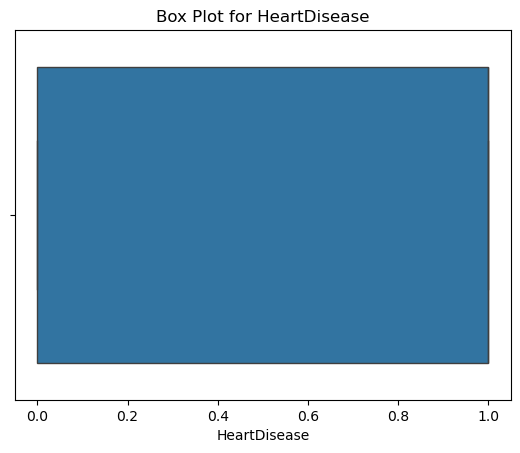

In [653]:
for column in cleaned_data.columns:
    sns.boxplot(x=cleaned_data[column])
    plt.title(f"Box Plot for {column}")
    plt.show()

In [654]:
#Encoding categorical columns in the data to be able to use it in heatmap

dataenc = pd.DataFrame(cleaned_data)
dataenc['Sex'] = cleaned_data['Sex'].astype('category').cat.codes
dataenc['ChestPainType'] = cleaned_data['ChestPainType'].astype('category').cat.codes
dataenc['RestingECG'] = cleaned_data['RestingECG'].astype('category').cat.codes
dataenc['ExerciseAngina'] = cleaned_data['ExerciseAngina'].astype('category').cat.codes
dataenc['ST_Slope'] = cleaned_data['ST_Slope'].astype('category').cat.codes

dataenc.head(5)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,42,1,2,120.0,240.000000,1,1,194,0,0.8,0,0
1,36,1,2,130.0,209.000000,0,1,178,0,0.0,2,0
2,56,1,0,150.0,213.000000,1,1,125,1,1.0,1,1
3,37,0,2,130.0,211.000000,0,1,142,0,0.0,2,0
4,51,1,0,120.0,245.507538,1,1,104,0,0.0,1,1


<Axes: >

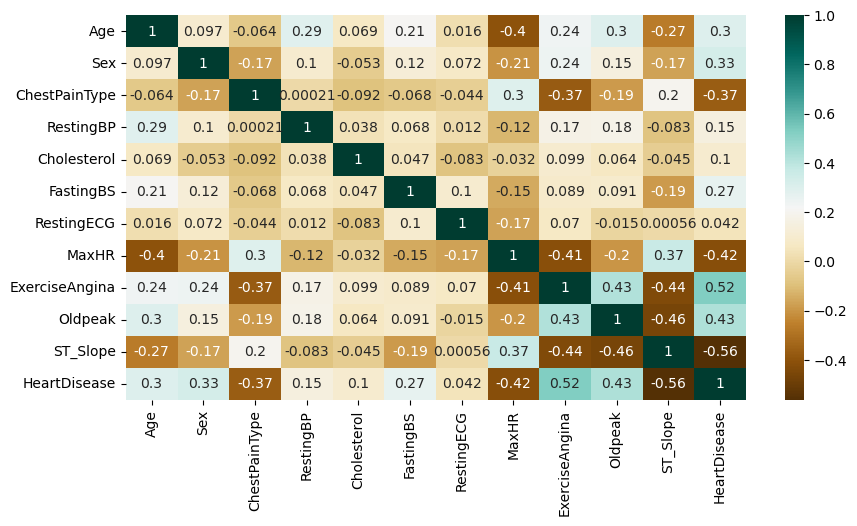

In [655]:
#Heatmap indicating correlation between features

plt.figure(figsize=(10,5))
correlation= dataenc.corr()
sns.heatmap(correlation,cmap="BrBG",annot=True)


# Data Preprocessing

In [656]:
cleaned_data.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,42,M,NAP,120.0,240.000000,1,Normal,194,N,0.8,Down,0
1,36,M,NAP,130.0,209.000000,0,Normal,178,N,0.0,Up,0
2,56,M,ASY,150.0,213.000000,1,Normal,125,Y,1.0,Flat,1
3,37,F,NAP,130.0,211.000000,0,Normal,142,N,0.0,Up,0
4,51,M,ASY,120.0,245.507538,1,Normal,104,N,0.0,Flat,1


In [657]:
#Separating features and target

X = cleaned_data.drop(columns=['HeartDisease'])
y = cleaned_data['HeartDisease']
X.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,42,M,NAP,120.0,240.000000,1,Normal,194,N,0.8,Down
1,36,M,NAP,130.0,209.000000,0,Normal,178,N,0.0,Up
2,56,M,ASY,150.0,213.000000,1,Normal,125,Y,1.0,Flat
3,37,F,NAP,130.0,211.000000,0,Normal,142,N,0.0,Up
4,51,M,ASY,120.0,245.507538,1,Normal,104,N,0.0,Flat


In [658]:
#Encoding FastingBS column to treat it as a categorical column in preprocessing

X['FastingBS'] = X['FastingBS'].replace(1,'Y')
X['FastingBS'] = X['FastingBS'].replace(0,'N')

#Separating categorical and numerical columns to do apply different types of preprocessing

numerical = X.select_dtypes(include=['int64','float64']).columns
category = X.select_dtypes(include=['object']).columns
print(category)
print(numerical)
X.head(5)

Index(['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina',
       'ST_Slope'],
      dtype='object')
Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'], dtype='object')


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,42,M,NAP,120.0,240.000000,Y,Normal,194,N,0.8,Down
1,36,M,NAP,130.0,209.000000,N,Normal,178,N,0.0,Up
2,56,M,ASY,150.0,213.000000,Y,Normal,125,Y,1.0,Flat
3,37,F,NAP,130.0,211.000000,N,Normal,142,N,0.0,Up
4,51,M,ASY,120.0,245.507538,Y,Normal,104,N,0.0,Flat


In [659]:
from sklearn.model_selection import train_test_split

#Splitting dataset with 80% training and 20% test

X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.2)
# X_val , X_test , y_val , y_test = train_test_split(X_temp,y_temp,test_size=0.5)

In [660]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#Using standardscaler for numerical data and onehot encoding for categorical data

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical),
        ("cat", OneHotEncoder(), category),
    ]
)

In [661]:
#Using fit_transform on training data to calculate training data statistics and use it for transformation

X_train_scaled = preprocessor.fit_transform(X_train)

#Using transform only to use previous statistics and transform the test data

X_test_scaled  = preprocessor.transform(X_test)

#X_val_scaled = preprocessor.transform(X_val)

# KNN


In [662]:
#Using optuna to optimize KNN hyperparameters

import optuna
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#Defining objective trial and using cross validation to tune hyperparameters

def objective(trial):
    k = trial.suggest_int('n_neighbors',1,31,step=2)

    metric = trial.suggest_categorical('metric',['euclidean','manhattan','minkowski'])

    knn = KNeighborsClassifier(n_neighbors=k,metric=metric)

    score = cross_val_score(knn,X_train_scaled,y_train,cv=5).mean()

    return score


In [663]:
#optimizing parameters by maximizing over mean score of cross validation

study = optuna.create_study(direction='maximize')

study.optimize(func=objective,n_trials=100)


[I 2024-09-14 23:51:44,380] A new study created in memory with name: no-name-49beef33-9b18-47f4-9dd0-2c59d5087dda
[I 2024-09-14 23:51:44,402] Trial 0 finished with value: 0.8544652128764278 and parameters: {'n_neighbors': 21, 'metric': 'minkowski'}. Best is trial 0 with value: 0.8544652128764278.
[I 2024-09-14 23:51:44,424] Trial 1 finished with value: 0.8563516787815854 and parameters: {'n_neighbors': 25, 'metric': 'minkowski'}. Best is trial 1 with value: 0.8563516787815854.
[I 2024-09-14 23:51:44,437] Trial 2 finished with value: 0.8525787469712703 and parameters: {'n_neighbors': 11, 'metric': 'manhattan'}. Best is trial 1 with value: 0.8563516787815854.
[I 2024-09-14 23:51:44,448] Trial 3 finished with value: 0.8040671512634129 and parameters: {'n_neighbors': 1, 'metric': 'manhattan'}. Best is trial 1 with value: 0.8563516787815854.
[I 2024-09-14 23:51:44,459] Trial 4 finished with value: 0.865662859120803 and parameters: {'n_neighbors': 17, 'metric': 'manhattan'}. Best is trial 4 

In [664]:
#fitting knn model using tuned hyperparameters

print(study.best_params)

model = KNeighborsClassifier(**study.best_params)

model.fit(X_train_scaled,y_train)


{'n_neighbors': 29, 'metric': 'manhattan'}


KNeighborsClassifier(metric='manhattan', n_neighbors=29)

In [665]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_predict = model.predict(X_test_scaled)

accuracy = model.score(X_test_scaled,y_test)

print("Accuracy of the model is:", accuracy)
print("Precision:", precision_score(y_test, y_predict))
print("Recall:", recall_score(y_test, y_predict))
print("F1 Score:", f1_score(y_test, y_predict))


Accuracy of the model is: 0.8880597014925373
Precision: 0.881578947368421
Recall: 0.9178082191780822
F1 Score: 0.8993288590604027


In [680]:
import joblib

joblib.dump(model,'knn_model3.joblib')


['knn_model3.joblib']

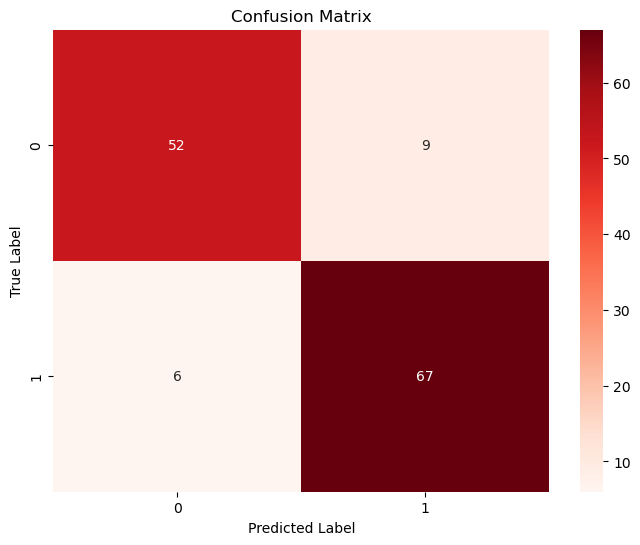

In [667]:
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test,y_predict)

classes = np.unique(y)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', 
            xticklabels = classes,  
            yticklabels = classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Logistic Regression

In [668]:
from sklearn.linear_model import LogisticRegression

regmodel = LogisticRegression()

regmodel.fit(X_train_scaled,y_train)

y_predict_reg = regmodel.predict(X_test_scaled)

accreg = regmodel.score(X_test_scaled,y_test)

print("Accuracy of the model is:", accreg)
print("Precision:", precision_score(y_test, y_predict_reg))
print("Recall:", recall_score(y_test, y_predict_reg))
print("F1 Score:", f1_score(y_test, y_predict_reg))


Accuracy of the model is: 0.8582089552238806
Precision: 0.8552631578947368
Recall: 0.8904109589041096
F1 Score: 0.87248322147651


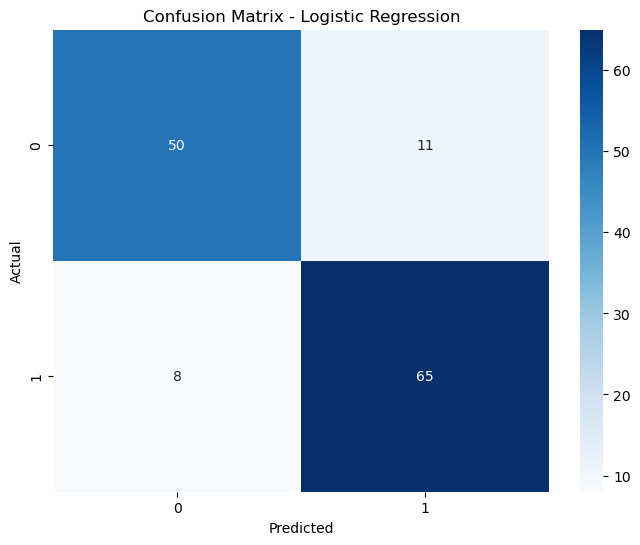

In [669]:
conf_matrix_log_reg = confusion_matrix(y_test, y_predict_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Deep Learning

In [670]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

#Input shape to determine input layer of the neural network
 
X_train_scaled.shape

(536, 21)

In [671]:
# def create_model(trial):
#     # We optimize the numbers of layers, their units and learning rates 
#     batch_size = trial.suggest_int('batch_size',32,256,step=32)
#     epochs = trial.suggest_int('epochs',10,100,step=10)
#     learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
    
#     # build model
#     modeldl = Sequential([
#     Input((21,)),
#     Dense(128, activation='relu'),
#     Dense(32, activation='relu'),
#     Dense(1,activation='sigmoid'), #sigmoid function for binary classification
# ])
#     # compile the model
#     modeldl.compile(loss='binary_crossentropy',
#                   optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
#                   metrics=['accuracy'])
    
#     modeldl.fit(X_train_scaled
#                   ,y_train
#                   ,epochs = epochs
#                   ,batch_size=batch_size
#                   ,shuffle=True
#                   ,validation_data=(X_val_scaled,y_val)
#                   ,verbose=0)
#     acc_score = modeldl.evaluate(X_val_scaled, y_val, verbose=0)[1]
    
#     return acc_score

In [672]:
# study2 = optuna.create_study(direction='maximize')

# study2.optimize(func=create_model,n_trials=100)



In [673]:
# print(study2.best_params)

In [674]:
modeldl = Sequential([
    Input((21,)),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1,activation='sigmoid'), #sigmoid function for binary classification
])

In [675]:
modeldl.summary()

Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_159 (Dense)               │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_160 (Dense)               │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_161 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,977 (27.25 KB)

 Trainable params: 6,977 (27.25 KB)

 Non-trainable params: 0 (0.00 B)

In [676]:
modeldl.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = modeldl.fit(X_train_scaled,y_train,epochs=10,batch_size=64)

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 750us/step - accuracy: 0.5736 - loss: 0.6730
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.8281 - loss: 0.5346
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.8345 - loss: 0.4547
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.8376 - loss: 0.4110
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.8607 - loss: 0.3628
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.8637 - loss: 0.3472
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.8587 - loss: 0.3300
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - accuracy: 0.8673 - loss: 0.3136
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.8713 - loss: 0.3212
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.8804 - loss: 0.3107


In [677]:
test_loss, test_acc = modeldl.evaluate(X_test_scaled, y_test)
print(f'\nTest accuracy: {test_acc}')
predictions = modeldl.predict(X_test_scaled)
predictions = [1 if x >= 0.5 else 0 for x in predictions]
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1 Score:", f1_score(y_test, predictions))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.8583 - loss: 0.4257

Test accuracy: 0.8731343150138855
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Accuracy: 0.8731343283582089
Precision: 0.8783783783783784
Recall: 0.8904109589041096
F1 Score: 0.8843537414965986


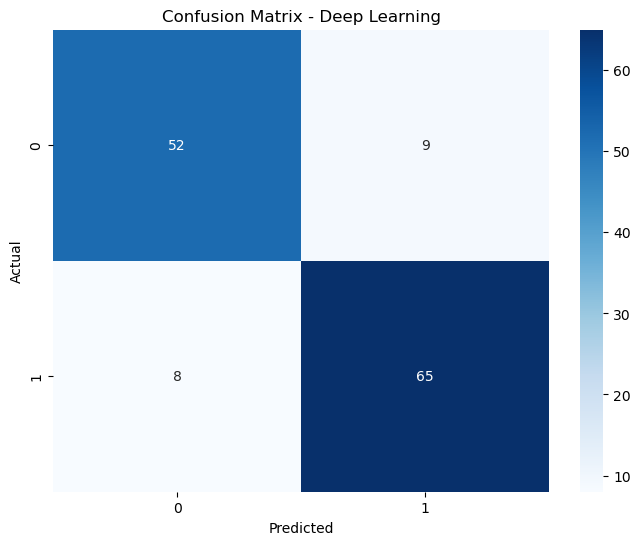

In [678]:
conf_matrix_dl = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dl, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Deep Learning')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [681]:
modeldl.save('model2.keras')

In [679]:
# import joblib

# joblib.dump(model,'knn_model.joblib')
# joblib.dump(regmodel,'Lreg_model.joblib')

# modeldl.save('model.keras')
# joblib.dump(preprocessor,'preprocessor.joblib')